First 5 rows of the dataset:
  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  

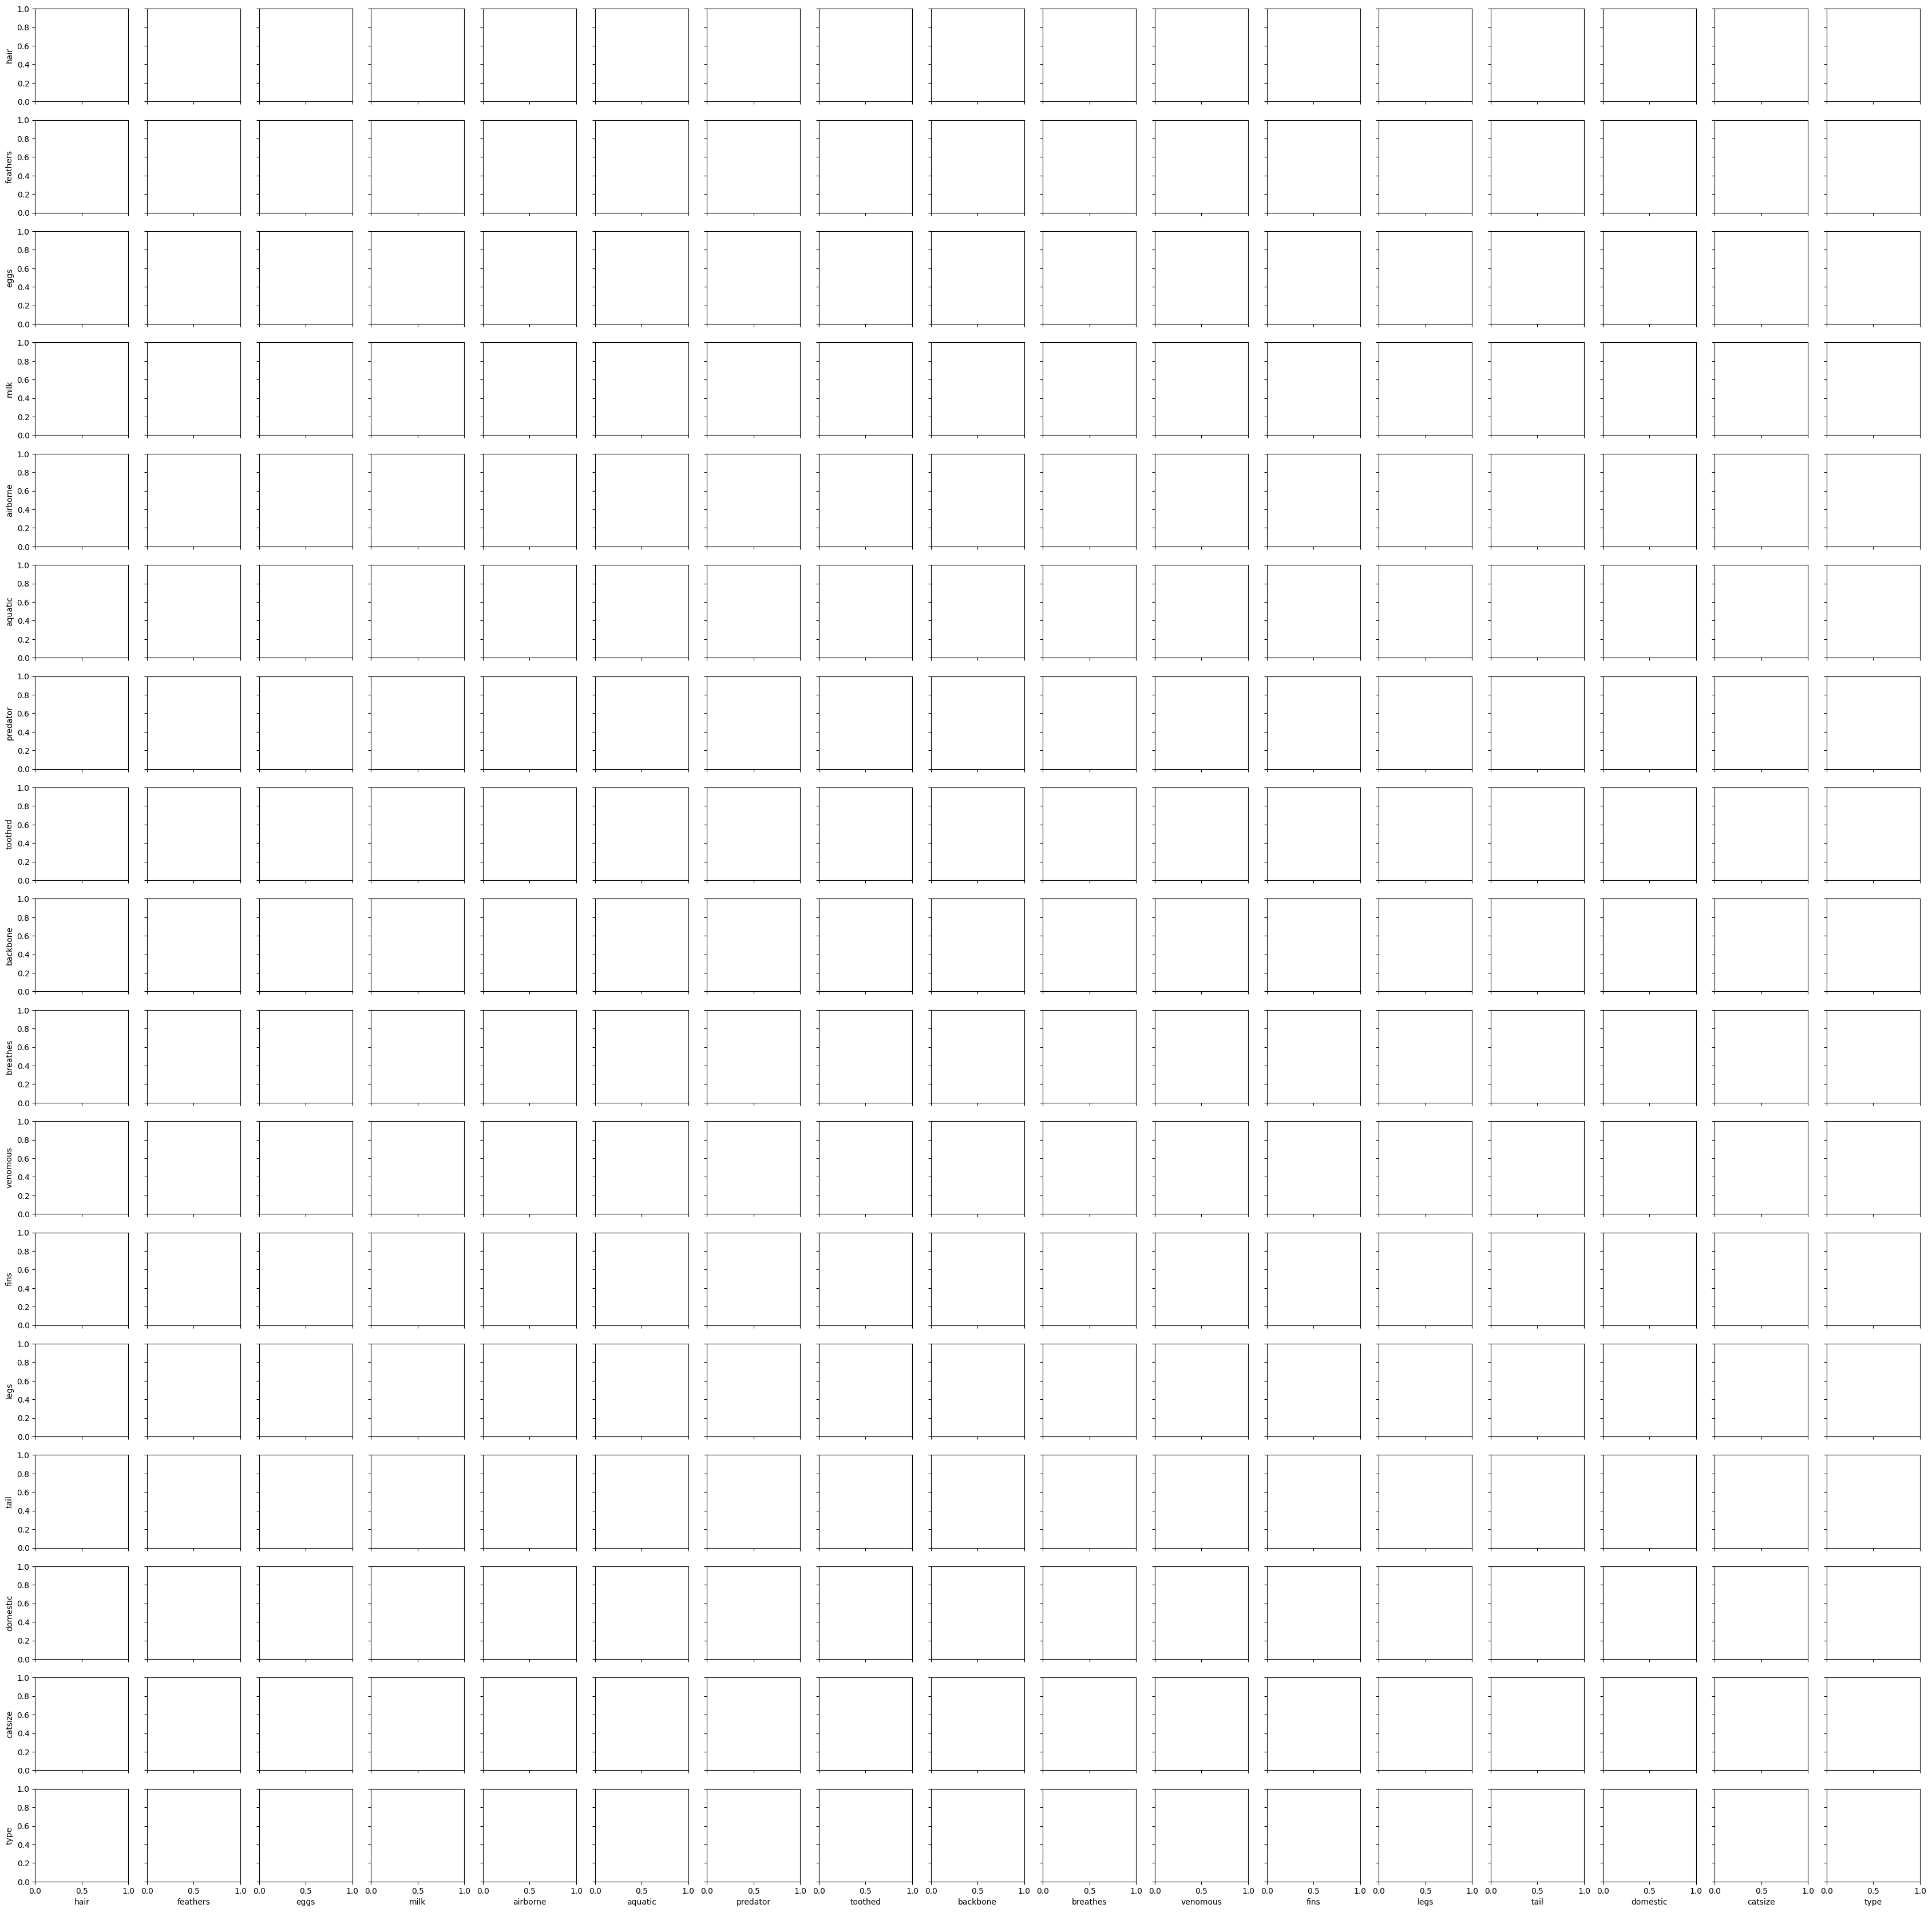

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Zoo.csv')  # Replace with the actual file path

# Basic exploration
print("First 5 rows of the dataset:")
print(df.head())           # View first few rows
print("\nDataset Information:")
print(df.info())           # Check for data types and null values
print("\nSummary Statistics:")
print(df.describe())       # Summary statistics for numeric columns

# Pair plot (for numeric features)
try:
    sns.pairplot(df, hue='class')  # Replace 'class' with the target column name
    plt.title('Pairwise Feature Relationships')
    plt.show()
except Exception as e:
    print(f"Pair plot error: {e}")

# Class distribution (for categorical target)
try:
    sns.countplot(x='class', data=df)  # Replace 'class' with the target column name
    plt.title('Class Distribution')
    plt.show()
except Exception as e:
    print(f"Class distribution plot error: {e}")


In [9]:
# Handle missing values
numeric_cols = df.select_dtypes(include=['number']).columns  # Get numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Mean imputation for numeric cols only
# If you have a specific categorical column you want to handle:
# df['categorical_col'].fillna(df['categorical_col'].mode()[0], inplace=True)  # Mode imputation for a specific column

# Handle outliers (using IQR)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]  # Remove outliers

print(df.isnull().sum())  # Confirm no missing values remain

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [11]:
# Separate features and target
X = df.drop(columns='animal name')  # Assuming 'animal name' is the target column name
y = df['animal name']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (26, 17)
Testing set size: (7, 17)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
k = 5  # Example value for K, can be optimized later
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Using Euclidean distance

# Fit the model
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

    antelope       0.00      0.00      0.00       0.0
        bear       0.00      0.00      0.00       0.0
        boar       0.00      0.00      0.00       0.0
     cheetah       0.00      0.00      0.00       0.0
        frog       0.00      0.00      0.00       1.0
     giraffe       0.00      0.00      0.00       1.0
        lion       0.00      0.00      0.00       0.0
        mink       0.00      0.00      0.00       1.0
    mongoose       0.00      0.00      0.00       1.0
     opossum       0.00      0.00      0.00       1.0
    squirrel       0.00      0.00      0.00       1.0
     wallaby       0.00      0.00      0.00       1.0

    accuracy                           0.00       7.0
   macro avg       0.00      0.00      0.00       7.0
weighted avg       0.00      0.00      0.00       7.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


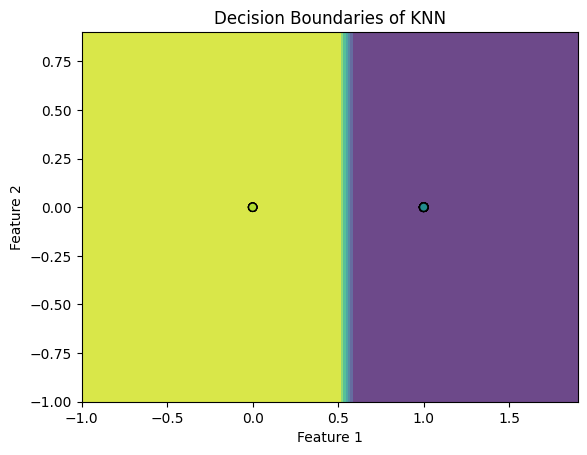

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# ... (previous code) ...

# Reduce to 2 features for visualization (if needed)
X_train_vis = X_train.iloc[:, :2]
X_test_vis = X_test.iloc[:, :2]

# Create a LabelEncoder to convert class labels to numerical values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train KNN on the reduced dataset using encoded labels
knn.fit(X_train_vis, y_train_encoded)

# Create a meshgrid for decision boundaries
x_min, x_max = X_train_vis.iloc[:, 0].min() - 1, X_train_vis.iloc[:, 0].max() + 1
y_min, y_max = X_train_vis.iloc[:, 1].min() - 1, X_train_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train_encoded, edgecolor='k', marker='o')  # Use encoded labels for plotting
plt.title('Decision Boundaries of KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

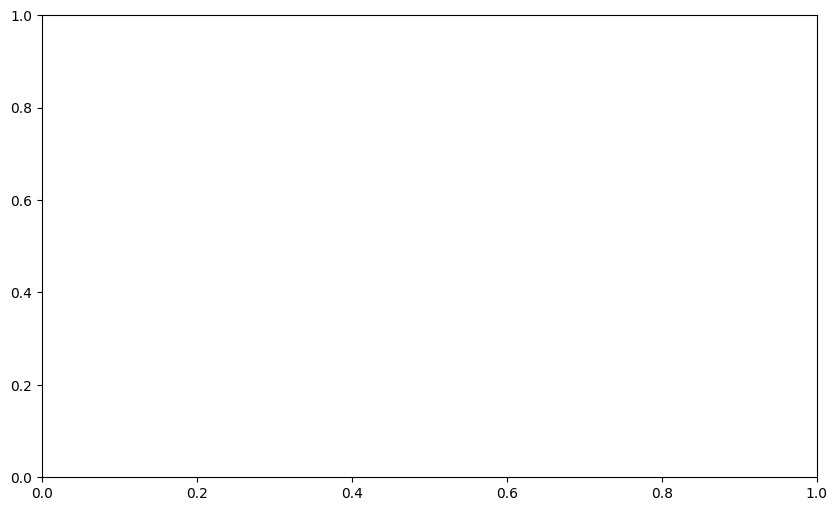

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Ensure the dataset has at least 2 features
if X_train.shape[1] < 2 or X_test.shape[1] < 2:
    raise ValueError("The dataset must have at least two features for visualization.")

# Select two features for visualization (first two features)
X_train_vis = X_train.iloc[:, :2]
X_test_vis = X_test.iloc[:, :2]

# Train a KNN classifier
try:
    knn_vis = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn_vis.fit(X_train_vis, y_train)
except Exception as e:
    print(f"Error training KNN: {e}")
    raise

# Create a meshgrid for visualization
x_min, x_max = X_train_vis.iloc[:, 0].min() - 1, X_train_vis.iloc[:, 0].max() + 1
y_min, y_max = X_train_vis.iloc[:, 1].min() - 1, X_train_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict grid points
try:
    Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
except Exception as e:
    print(f"Error predicting meshgrid points: {e}")
    raise

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Plot training points
plt.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training data')

# Plot testing points
plt.scatter(X_test_vis.iloc[:, 0], X_test_vis.iloc[:, 1], c=y_test, edgecolor='k', marker='x', cmap='coolwarm', label='Testing data')

plt.title("Decision Boundaries of KNN Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [25]:
print(X_train.dtypes)  # Check data types of features
print(y_train.dtype)   # Check data type of target


hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object
object


In [29]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 96     wallaby
48        mink
84    squirrel
50    mongoose
25        frog
28     giraffe
54     opossum
Name: animal name, dtype: object

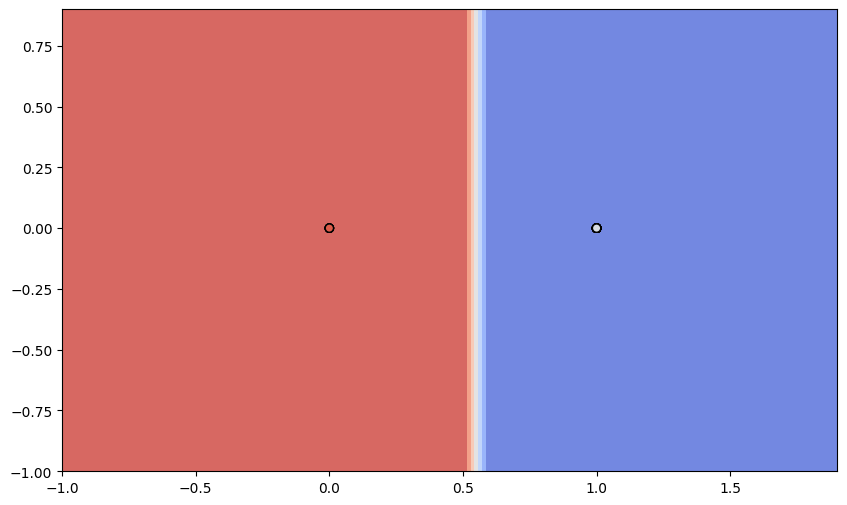

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Select the first two features
X_train_vis = X_train.iloc[:, :2]
X_test_vis = X_test.iloc[:, :2]

# Train KNN classifier
knn_vis = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_vis.fit(X_train_vis, y_train)

# Create meshgrid
x_min, x_max = X_train_vis.iloc[:, 0].min() - 1, X_train_vis.iloc[:, 0].max() + 1
y_min, y_max = X_train_vis.iloc[:, 1].min() - 1, X_train_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on meshgrid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Plot training points
plt.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training data')

# Plot testing points
plt.scatter(X_test_vis.iloc[:, 0], X_test_vis.iloc[:, 1], c=y_test, edgecolor='k', marker='x', cmap='coolwarm', label='Testing data')

plt.title("Decision Boundaries of KNN Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Encode training labels
y_test = le.transform(y_test)        # Encode testing labels


ValueError: invalid literal for int() with base 10: 'wallaby'

In [32]:
print("y_train type:", type(y_train))
print("Unique values in y_train:", y_train.unique() if hasattr(y_train, "unique") else np.unique(y_train))


y_train type: <class 'numpy.ndarray'>
Unique values in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [33]:
y_train = y_train.astype(str)
y_test = y_test.astype(str)


In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Ensure y_train and y_test are strings, which is common for categorical labels
y_train = y_train.astype(str)
y_test = y_test.astype(str)

# Combine y_train and y_test into one Series
combined_labels = pd.concat([y_train, y_test], axis=0)

# Initialize and fit the LabelEncoder on combined labels
le = LabelEncoder()
le.fit(combined_labels)

# Transform y_train and y_test using the learned encoder
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Print mapping for reference
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping: {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '3': 19, '4': 20, '5': 21, '6': 22, '7': 23, '8': 24, '9': 25, 'frog': 26, 'giraffe': 27, 'mink': 28, 'mongoose': 29, 'opossum': 30, 'squirrel': 31, 'wallaby': 32}


In [38]:
print("Data types after conversion:", y_train.dtype, y_test.dtype)
print("Encoded y_train:", y_train)
print("Encoded y_test:", y_test)


Data types after conversion: int64 int64
Encoded y_train: [24 12  0 13 21 14 19 18  3  1  4  8 11  6  2  9 25 22  5 15 23 10 16 17
 20  7]
Encoded y_test: [32 28 31 29 26 27 30]


Label mapping: {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '4': 27, '5': 28, '6': 29, '7': 30, '8': 31, '9': 32}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-40-fffef41ec01f>:56: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_vis.iloc[:, 0], X_test_vis.iloc[:, 1], c=y_test, edgecolor='k', marker='x', cmap='coolwarm', label='Testing data')


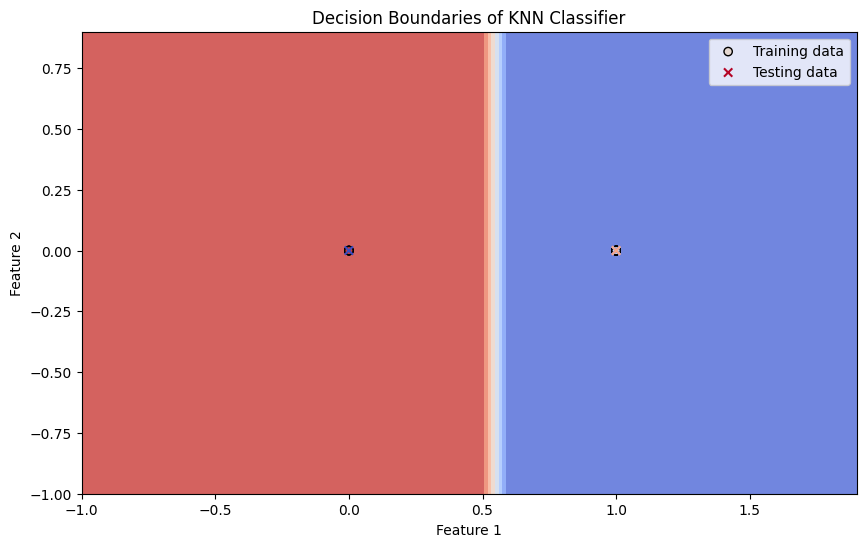

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded into X and y
# Example: Replace this with your actual dataset
# X = your_features_dataframe
# y = your_target_series

# Ensure y_train and y_test are pandas Series
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Combine y_train and y_test into one Series for fitting LabelEncoder
combined_labels = pd.concat([y_train, y_test], axis=0)

# Initialize LabelEncoder and fit it on the combined labels
le = LabelEncoder()
le.fit(combined_labels)

# Transform y_train and y_test using the learned encoder
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Print the label mapping for reference
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Select the first two features for visualization (ensure your dataset has at least 2 features)
X_train_vis = X_train.iloc[:, :2]
X_test_vis = X_test.iloc[:, :2]

# Train the KNN classifier (with k=5 and Euclidean distance)
knn_vis = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_vis.fit(X_train_vis, y_train)

# Create a meshgrid for plotting the decision boundaries
x_min, x_max = X_train_vis.iloc[:, 0].min() - 1, X_train_vis.iloc[:, 0].max() + 1
y_min, y_max = X_train_vis.iloc[:, 1].min() - 1, X_train_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid to plot decision boundaries
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Plot the training points
plt.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training data')

# Plot the testing points
plt.scatter(X_test_vis.iloc[:, 0], X_test_vis.iloc[:, 1], c=y_test, edgecolor='k', marker='x', cmap='coolwarm', label='Testing data')

plt.title("Decision Boundaries of KNN Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
